In [1]:
import matplotlib.pyplot as plt
import numpy as np
import os
import csv



In [2]:
# ['testCompleteC45W1P50-0-20240109-11:11:16-14684', 'vector', 'J_Network.queuer', 'jobsQueueLen:vector', '', '', '', '', '', '', '', '', '', '........' , '0 1 .......'

# FILE : testExpP50_25_all.csv
# ROW : [ 'testExpP50-1-20240110-18:12:49-3640',  'vector', 'J_Network.queuer', 'jobsQueueLen:vector', '', '', '', '', '', '', '', '', '', '...tempi...' , '0 1 .......' ]


#   USE ESPONENTIAL OR CONSTANT
use_exp = False

if use_exp == True:
    distribution = "Exp"
elif use_exp == False:
    distribution = "Con"

#   target_tso = ["50"]
detailed = False
if detailed == True :
    target_tso = list(range(25, 55+1, 3) )
else :
    if use_exp == True :
        target_tso = ["25","30","35", "40", "45", "50"]
    elif use_exp == False:
        target_tso = ["25","30","35", "40", "45", "50"]


# USE ALL ITERATIONS OR ONLY FIRST
num_iterations = 30
use_all = False


# PROBABILITY
probability = 50

In [3]:
print(target_tso)

['25', '30', '35', '40', '45', '50']


In [4]:
#   run,type,module,name,attrname,attrvalue,value,count,sumweights,mean,stddev,min,max,vectime,vecvalue
#   vector,J_Network.server_1,completedJob:vector

#   target_tso = ["25"]
    
r1 = "vector"
r2 = "J_Network.server_"
r3 = "completedJob:vector"
server_names = [0, 1]

general_array = []
for srvn in range(0, len(server_names)):
    jrespTime_all_tsos = []
    for tso_this_iter in range(0, len(target_tso), 1) :
        #   print(tso_this_iter)
        jrespTime_all_this_tso = []
        file_name_csv = f'test{distribution}P{probability}_{target_tso[tso_this_iter]}_all.csv'

        with open(f'../simulations/results/{file_name_csv}') as csv_file : 
            reader = csv.reader(csv_file)
            for row in reader:
                if row[1]==r1 and row[2] == f'{r2}{server_names[srvn]}' and row[3]==r3:
                    rigaTarget = list(row)
                    #   print("hit row : ", row)
                    #   print("listed row : ", rigaTarget)
                    #   print("len : ", len(rigaTarget))    #   15 .
                    #   print("13 : ", rigaTarget[13])  #   13 :  88842.22 92268.143 94401.199 97374.126 102381.932
                    #   print("14 : ", rigaTarget[14])  #   14 :  1733.82 1115.235 343.087 879.005 3157.046 1277.006
                    #   print("len 13 : ", len(rigaTarget[13]) )
                    print("len 14 : ", len(rigaTarget[14]) )

                    tempi_risposta = rigaTarget[-1].split(" ")
                    #   numeri = rigaTarget[-1].split(" ")
                    #   for cont in range(0, len(tempi)):
                    #       jrespTime_all_this_tso.append( ( int(numeri[cont]) , float(tempi[cont]) ) )
                    for cont in range(0, len(tempi_risposta)):
                        jrespTime_all_this_tso.append(tempi_risposta[cont])
                    
                    if use_all == False:
                        print("break")
                        break

        jrespTime_all_tsos.append(jrespTime_all_this_tso)
        print(f'{file_name_csv} _ len : {len(jrespTime_all_tsos[tso_this_iter])}' )
    general_array.append(jrespTime_all_tsos)

# now we have all tsos of all !


len 14 :  9359
break
testConP50_25_all.csv _ len : 1872
len 14 :  7079
break
testConP50_30_all.csv _ len : 1416
len 14 :  9439
break
testConP50_35_all.csv _ len : 1888
len 14 :  9439
break
testConP50_40_all.csv _ len : 1888
len 14 :  9439
break
testConP50_45_all.csv _ len : 1888
len 14 :  11597
break
testConP50_50_all.csv _ len : 1699
len 14 :  4799
break
testConP50_25_all.csv _ len : 960
len 14 :  7079
break
testConP50_30_all.csv _ len : 1416
len 14 :  4719
break
testConP50_35_all.csv _ len : 944
len 14 :  4719
break
testConP50_40_all.csv _ len : 944
len 14 :  4719
break
testConP50_45_all.csv _ len : 944
len 14 :  5799
break
testConP50_50_all.csv _ len : 849


In [5]:
#   for srvn in range(0, len(server_names)):
#       for tso_this_iter in range(0, len(target_tso), 1) :
#           for row in reader:
#               ...
#               if use_all == False:
#                   print("break")
#                   break


print(len(general_array))       #   2
print(general_array[0])
print(len(general_array[0]))    #   6
print(general_array[0][0])

2
[['1500', '1500', '1500', '1500', '1500', '1500', '1500', '1500', '1500', '1500', '1500', '1500', '1500', '1500', '1500', '1500', '1500', '1500', '1500', '1500', '1500', '1500', '1500', '1500', '1500', '1500', '1500', '1500', '1500', '1500', '1500', '1500', '1500', '1500', '1500', '1500', '1500', '1500', '1500', '1500', '1500', '1500', '1500', '1500', '1500', '1500', '1500', '1500', '1500', '1500', '1500', '1500', '1500', '1500', '1500', '1500', '1500', '1500', '1500', '1500', '1500', '1500', '1500', '1500', '1500', '1500', '1500', '1500', '1500', '1500', '1500', '1500', '1500', '1500', '1500', '1500', '1500', '1500', '1500', '1500', '1500', '1500', '1500', '1500', '1500', '1500', '1500', '1500', '1500', '1500', '1500', '1500', '1500', '1500', '1500', '1500', '1500', '1500', '1500', '1500', '1500', '1500', '1500', '1500', '1500', '1500', '1500', '1500', '1500', '1500', '1500', '1500', '1500', '1500', '1500', '1500', '1500', '1500', '1500', '1500', '1500', '1500', '1500', '1500', '150

In [6]:

#   #   for i in jQueueLen_vector:
#   #       nums.append( int(i[0]))
#   #   print(nums)

general_nums = []
for srvn in range(0, len(server_names)):
    nums_all_tsos = []
    for tso_this_iter in range(0, len(target_tso), 1) :
        nums = []
        for i in range(0, len(general_array[srvn][tso_this_iter]) ):
            #   print( general_array[srvn][tso_this_iter][i] )
            #   print(int(general_array[srvn][tso_this_iter][i]))
            #   #   !!! for histogram we need numbers not strings ! 
            nums.append( float( general_array[srvn][tso_this_iter][i]) )
        nums_all_tsos.append(nums)
        print(f'testExp_{target_tso[tso_this_iter]} len : {len(nums_all_tsos[tso_this_iter])}' )
    general_nums.append(nums_all_tsos)
# got all nums of all tsos

print(general_nums)

testExp_25 len : 1872
testExp_30 len : 1416
testExp_35 len : 1888
testExp_40 len : 1888
testExp_45 len : 1888
testExp_50 len : 1699
testExp_25 len : 960
testExp_30 len : 1416
testExp_35 len : 944
testExp_40 len : 944
testExp_45 len : 944
testExp_50 len : 849
[[[1500.0, 1500.0, 1500.0, 1500.0, 1500.0, 1500.0, 1500.0, 1500.0, 1500.0, 1500.0, 1500.0, 1500.0, 1500.0, 1500.0, 1500.0, 1500.0, 1500.0, 1500.0, 1500.0, 1500.0, 1500.0, 1500.0, 1500.0, 1500.0, 1500.0, 1500.0, 1500.0, 1500.0, 1500.0, 1500.0, 1500.0, 1500.0, 1500.0, 1500.0, 1500.0, 1500.0, 1500.0, 1500.0, 1500.0, 1500.0, 1500.0, 1500.0, 1500.0, 1500.0, 1500.0, 1500.0, 1500.0, 1500.0, 1500.0, 1500.0, 1500.0, 1500.0, 1500.0, 1500.0, 1500.0, 1500.0, 1500.0, 1500.0, 1500.0, 1500.0, 1500.0, 1500.0, 1500.0, 1500.0, 1500.0, 1500.0, 1500.0, 1500.0, 1500.0, 1500.0, 1500.0, 1500.0, 1500.0, 1500.0, 1500.0, 1500.0, 1500.0, 1500.0, 1500.0, 1500.0, 1500.0, 1500.0, 1500.0, 1500.0, 1500.0, 1500.0, 1500.0, 1500.0, 1500.0, 1500.0, 1500.0, 1500.0, 15

counts :  [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0.]
bins :  [1499.5        1499.51298701 1499.52597403 1499.53896104 1499.55194805
 1499.56493506 1499.57792208 1499.59090909 1499.6038961  1499.61688312
 1499.62987013 1499.64285714 1499.65584416 1499.66883117 1499.68181818
 1499.69480519 1499.70779221 1499.72077922 1499.73376623 1499.74675325
 1499.75974026 1499.77272727 1499.78571429 1499.7987013  1499.81168831
 1499.82467532 1499.83766234 1499.85064935 1499.86363636 1499.87662338
 1499.88961039 1499.9025974  1499.91558442 1499.92857143 1499.94155844
 1499.95454545 1499.96753247 1499.98051948 1499.99350649 1500.00649351
 1500.01948052 1500.03246753 1500.04545455 1500.05844156 1500.07142857
 1500.08441558 1500.0974026  1500.11038961 1500.12337662 1500.13636364
 1500.14935065 1500.16233766 1500.17

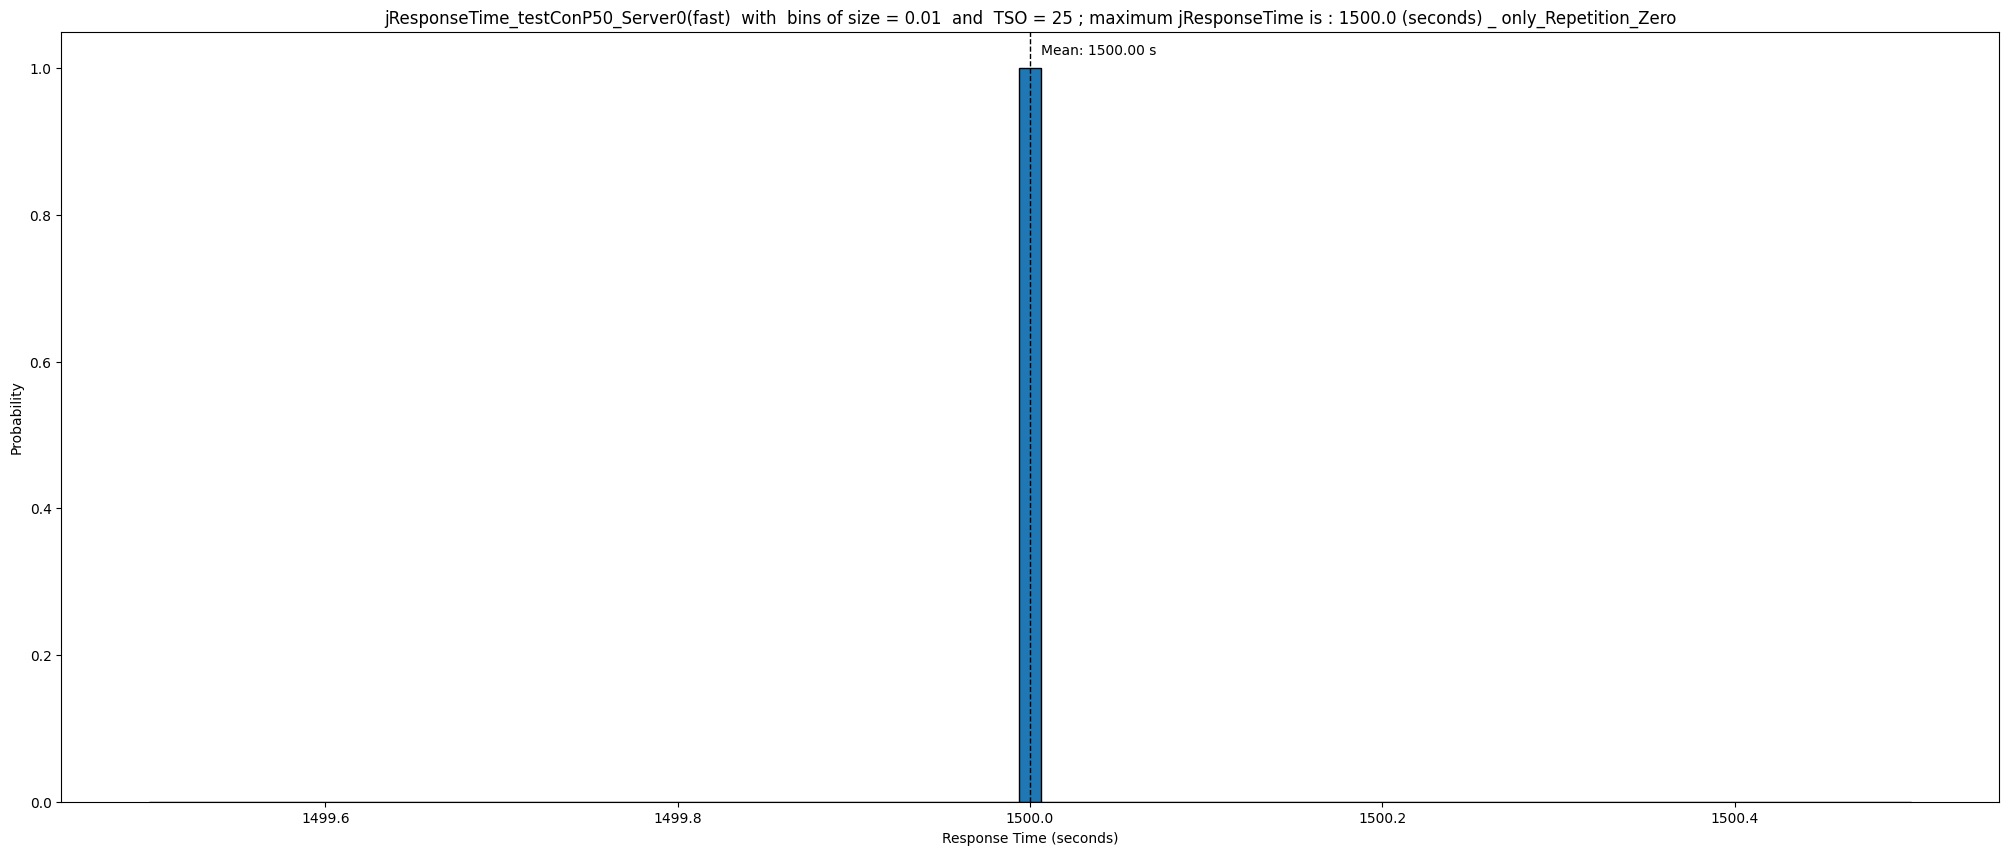

counts :  [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0.]
bins :  [1799.5        1799.51298701 1799.52597403 1799.53896104 1799.55194805
 1799.56493506 1799.57792208 1799.59090909 1799.6038961  1799.61688312
 1799.62987013 1799.64285714 1799.65584416 1799.66883117 1799.68181818
 1799.69480519 1799.70779221 1799.72077922 1799.73376623 1799.74675325
 1799.75974026 1799.77272727 1799.78571429 1799.7987013  1799.81168831
 1799.82467532 1799.83766234 1799.85064935 1799.86363636 1799.87662338
 1799.88961039 1799.9025974  1799.91558442 1799.92857143 1799.94155844
 1799.95454545 1799.96753247 1799.98051948 1799.99350649 1800.00649351
 1800.01948052 1800.03246753 1800.04545455 1800.05844156 1800.07142857
 1800.08441558 1800.0974026  1800.11038961 1800.12337662 1800.13636364
 1800.14935065 1800.16233766 1800.17

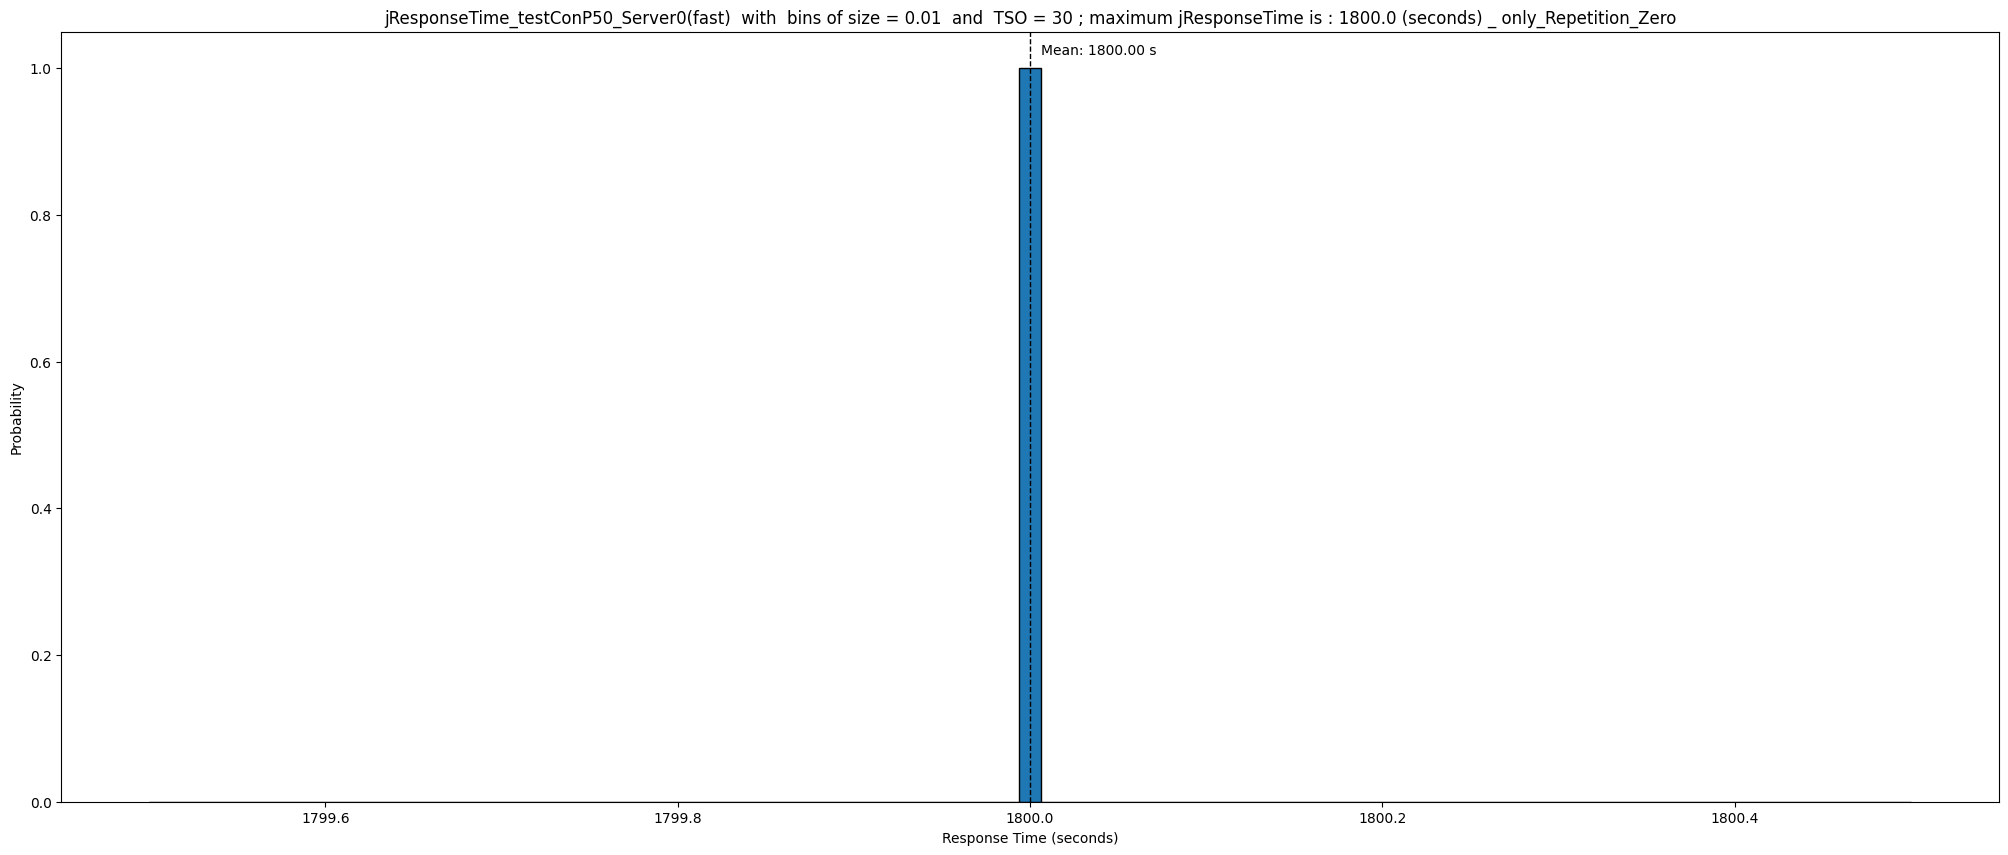

counts :  [0.5 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
 0.  0.  0.  0.  0.5]
bins :  [2100.         2103.8961039  2107.79220779 2111.68831169 2115.58441558
 2119.48051948 2123.37662338 2127.27272727 2131.16883117 2135.06493506
 2138.96103896 2142.85714286 2146.75324675 2150.64935065 2154.54545455
 2158.44155844 2162.33766234 2166.23376623 2170.12987013 2174.02597403
 2177.92207792 2181.81818182 2185.71428571 2189.61038961 2193.50649351
 2197.4025974  2201.2987013  2205.19480519 2209.09090909 2212.98701299
 2216.88311688 2220.77922078 2224.67532468 2228.57142857 2232.46753247
 2236.36363636 2240.25974026 2244.15584416 2248.05194805 2251.94805195
 2255.84415584 2259.74025974 2263.63636364 2267.53246753 2271.42857143
 2275.32467532 2279.22077922 2283

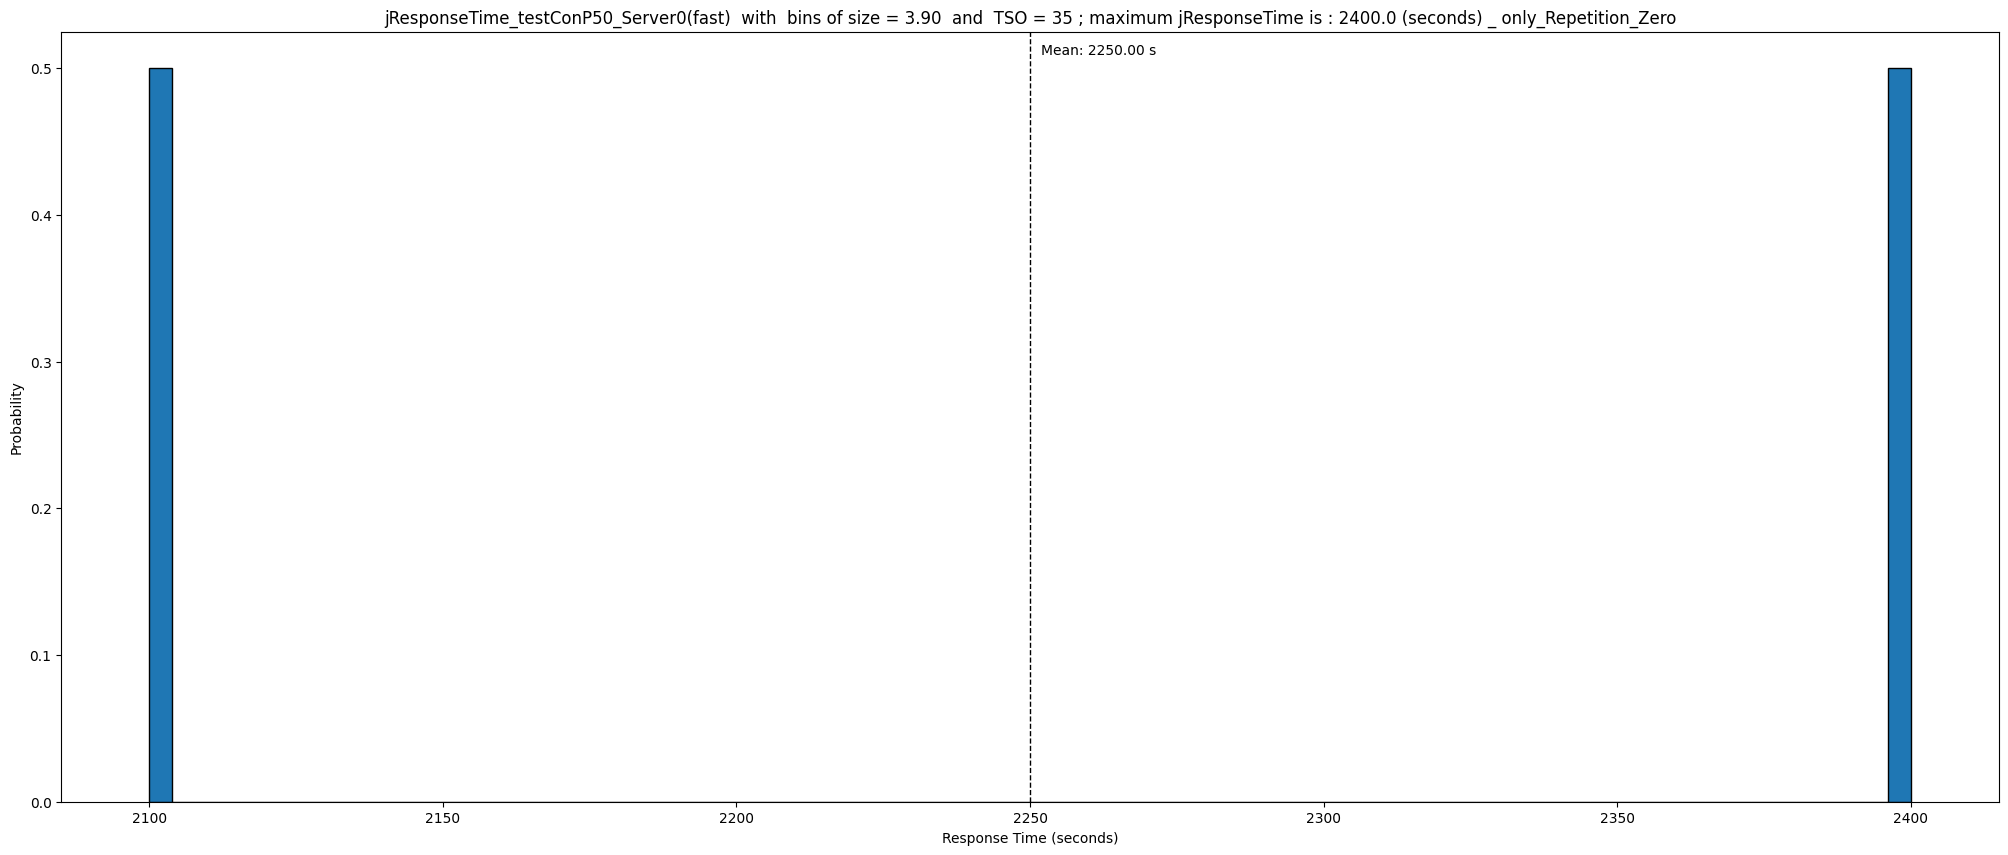

counts :  [0.5 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
 0.  0.  0.  0.  0.5]
bins :  [2400.         2407.79220779 2415.58441558 2423.37662338 2431.16883117
 2438.96103896 2446.75324675 2454.54545455 2462.33766234 2470.12987013
 2477.92207792 2485.71428571 2493.50649351 2501.2987013  2509.09090909
 2516.88311688 2524.67532468 2532.46753247 2540.25974026 2548.05194805
 2555.84415584 2563.63636364 2571.42857143 2579.22077922 2587.01298701
 2594.80519481 2602.5974026  2610.38961039 2618.18181818 2625.97402597
 2633.76623377 2641.55844156 2649.35064935 2657.14285714 2664.93506494
 2672.72727273 2680.51948052 2688.31168831 2696.1038961  2703.8961039
 2711.68831169 2719.48051948 2727.27272727 2735.06493506 2742.85714286
 2750.64935065 2758.44155844 2766.

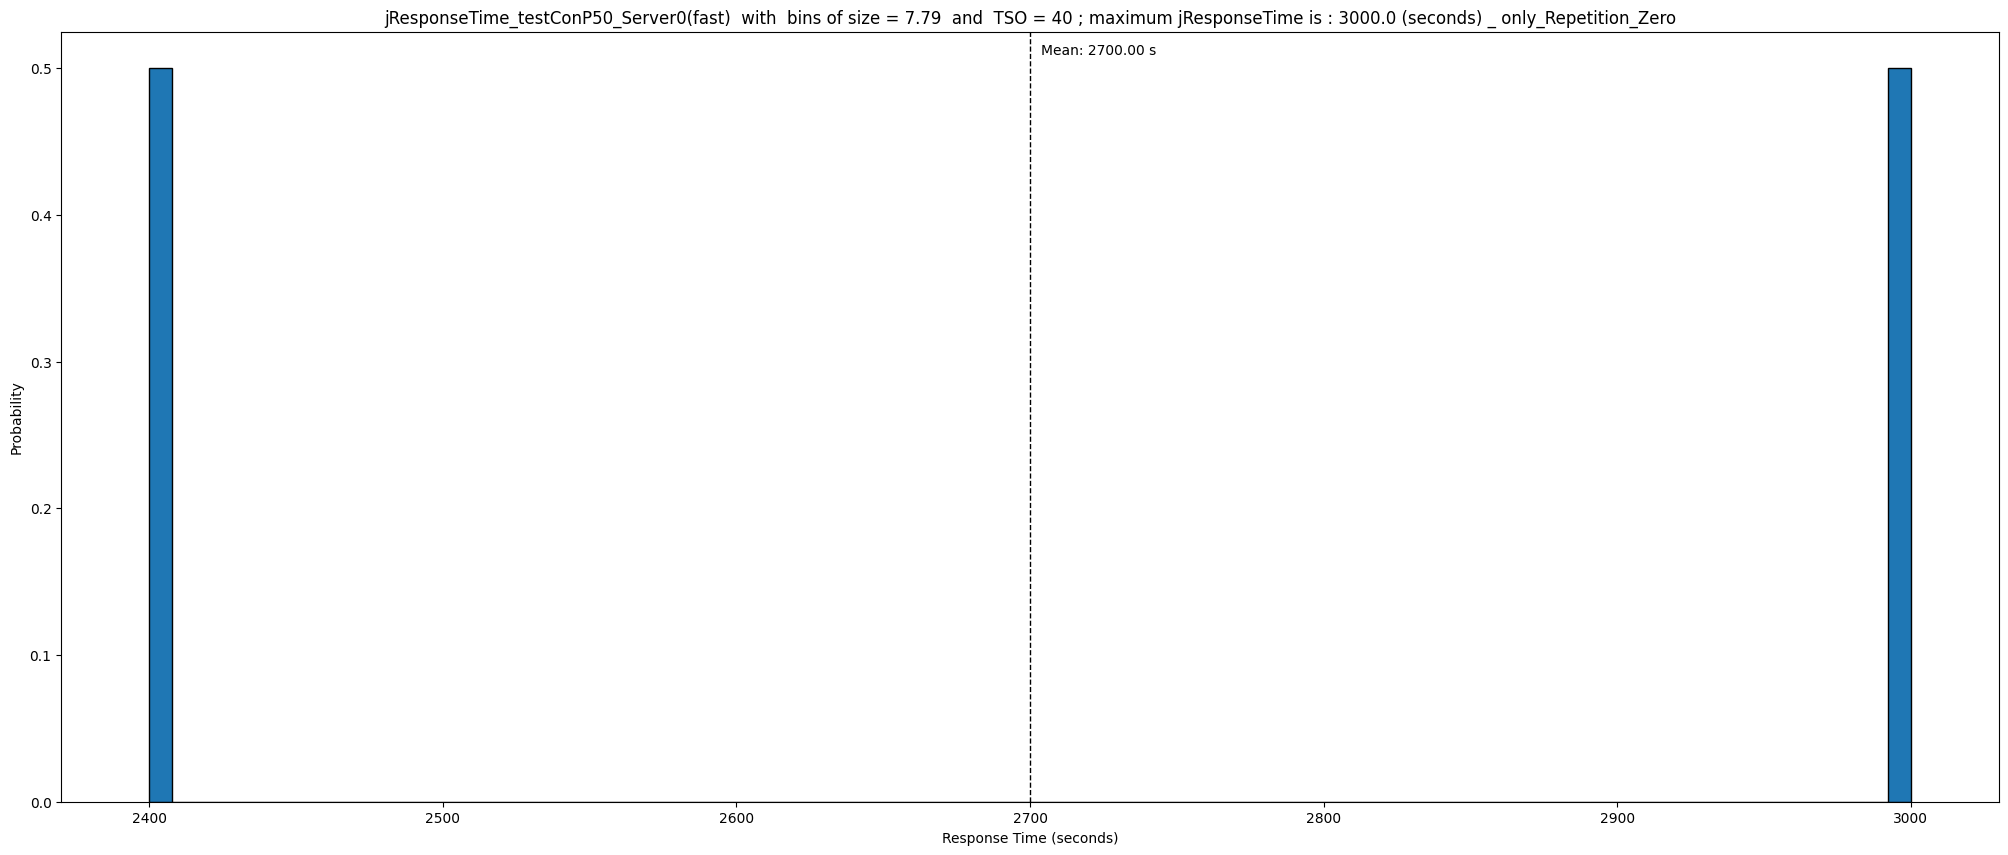

counts :  [0.5 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
 0.  0.  0.  0.  0.5]
bins :  [2700.         2711.68831169 2723.37662338 2735.06493506 2746.75324675
 2758.44155844 2770.12987013 2781.81818182 2793.50649351 2805.19480519
 2816.88311688 2828.57142857 2840.25974026 2851.94805195 2863.63636364
 2875.32467532 2887.01298701 2898.7012987  2910.38961039 2922.07792208
 2933.76623377 2945.45454545 2957.14285714 2968.83116883 2980.51948052
 2992.20779221 3003.8961039  3015.58441558 3027.27272727 3038.96103896
 3050.64935065 3062.33766234 3074.02597403 3085.71428571 3097.4025974
 3109.09090909 3120.77922078 3132.46753247 3144.15584416 3155.84415584
 3167.53246753 3179.22077922 3190.90909091 3202.5974026  3214.28571429
 3225.97402597 3237.66233766 3249.

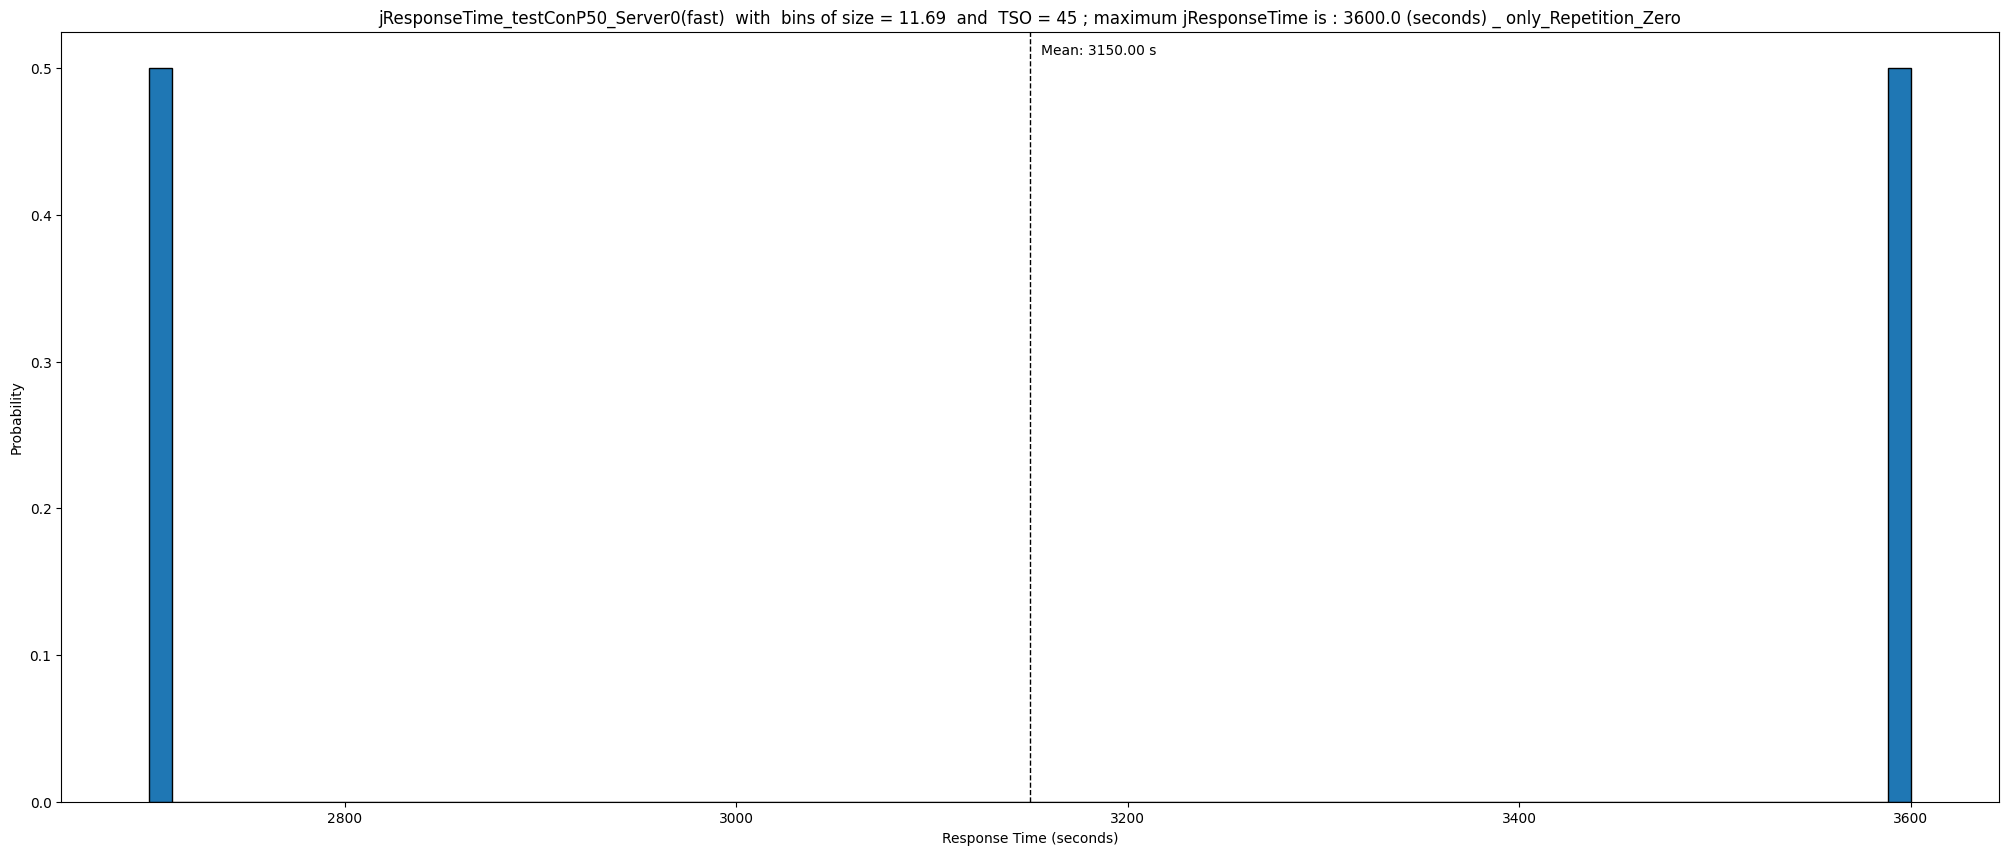

counts :  [0.01353737 0.01294879 0.01294879 0.01294879 0.01294879 0.01294879
 0.01294879 0.01294879 0.01294879 0.01294879 0.01294879 0.01294879
 0.01294879 0.01294879 0.01294879 0.01294879 0.01294879 0.01294879
 0.01294879 0.01294879 0.01294879 0.01294879 0.01294879 0.01294879
 0.01294879 0.01412596 0.01294879 0.01294879 0.01294879 0.01294879
 0.01294879 0.01294879 0.01294879 0.01294879 0.01294879 0.01294879
 0.01294879 0.01294879 0.01294879 0.01294879 0.01294879 0.01294879
 0.01294879 0.01294879 0.01294879 0.01294879 0.01294879 0.01294879
 0.01294879 0.01294879 0.01294879 0.01412596 0.01294879 0.01294879
 0.01294879 0.01294879 0.01294879 0.01294879 0.01294879 0.01294879
 0.01294879 0.01294879 0.01294879 0.01294879 0.01294879 0.01294879
 0.01294879 0.01294879 0.01294879 0.01294879 0.01294879 0.01294879
 0.01294879 0.01294879 0.01294879 0.01294879 0.01294879]
bins :  [ 11400.          18023.37662338  24646.75324675  31270.12987013
  37893.50649351  44516.88311688  51140.25974026  57763.

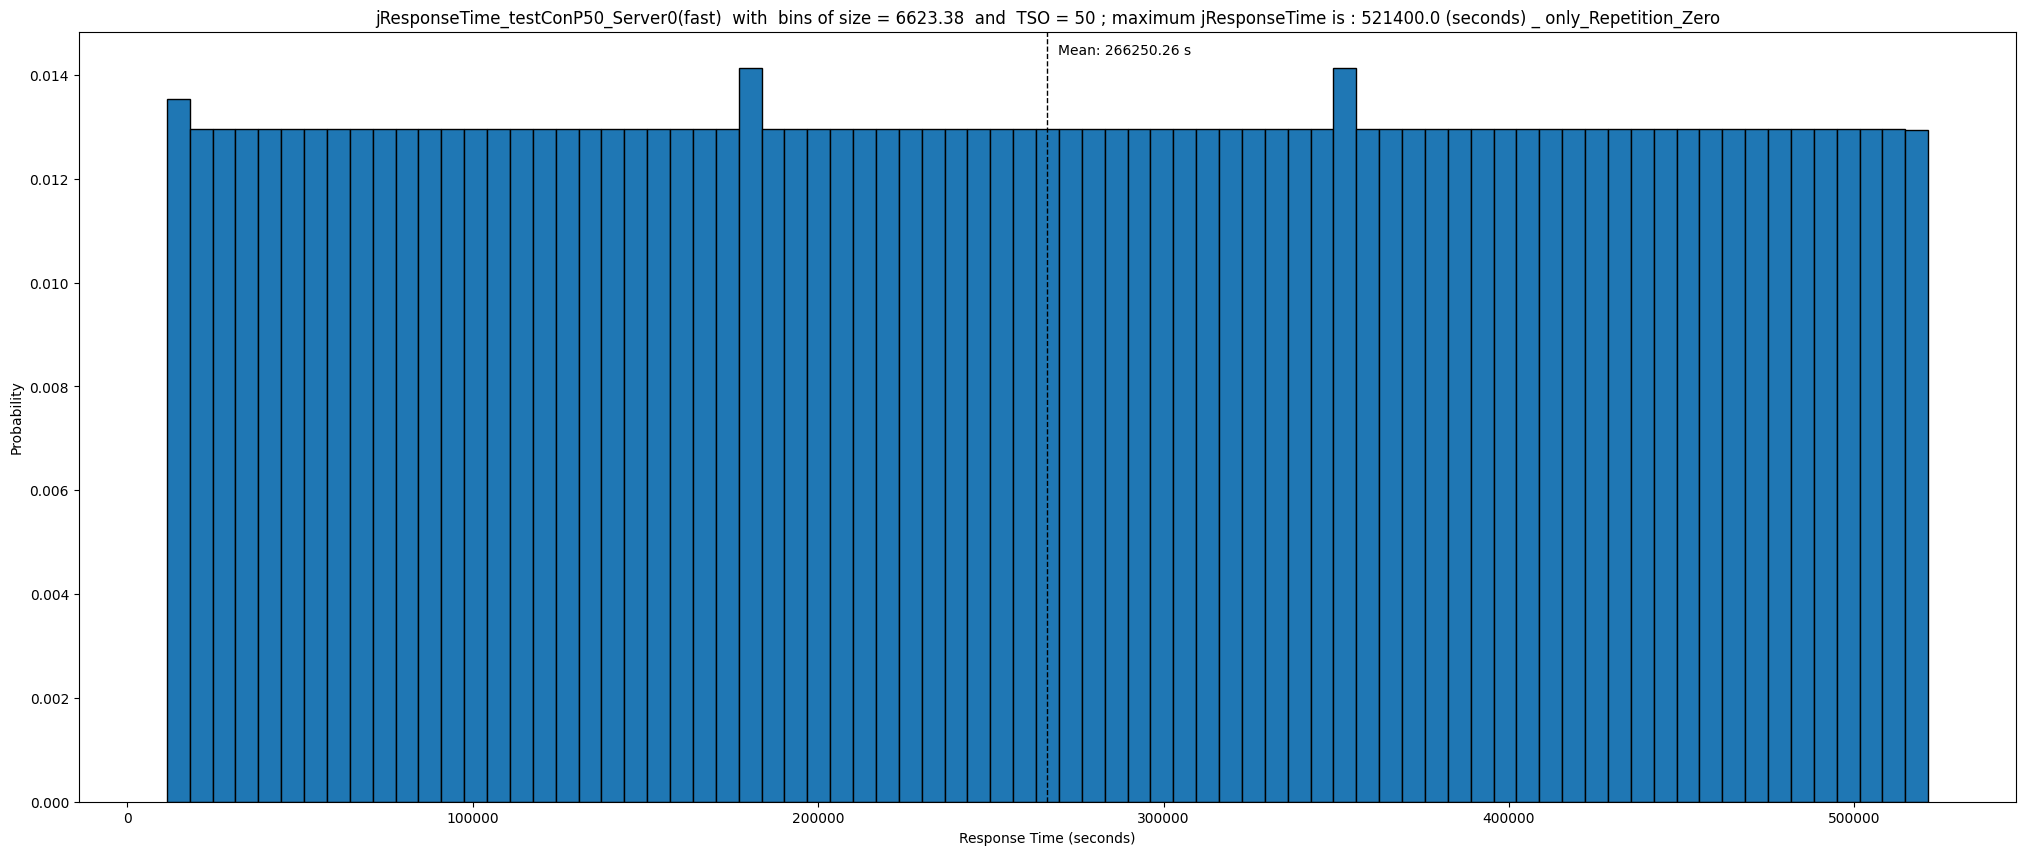

counts :  [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0.]
bins :  [2999.5        2999.51298701 2999.52597403 2999.53896104 2999.55194805
 2999.56493506 2999.57792208 2999.59090909 2999.6038961  2999.61688312
 2999.62987013 2999.64285714 2999.65584416 2999.66883117 2999.68181818
 2999.69480519 2999.70779221 2999.72077922 2999.73376623 2999.74675325
 2999.75974026 2999.77272727 2999.78571429 2999.7987013  2999.81168831
 2999.82467532 2999.83766234 2999.85064935 2999.86363636 2999.87662338
 2999.88961039 2999.9025974  2999.91558442 2999.92857143 2999.94155844
 2999.95454545 2999.96753247 2999.98051948 2999.99350649 3000.00649351
 3000.01948052 3000.03246753 3000.04545455 3000.05844156 3000.07142857
 3000.08441558 3000.0974026  3000.11038961 3000.12337662 3000.13636364
 3000.14935065 3000.16233766 3000.17

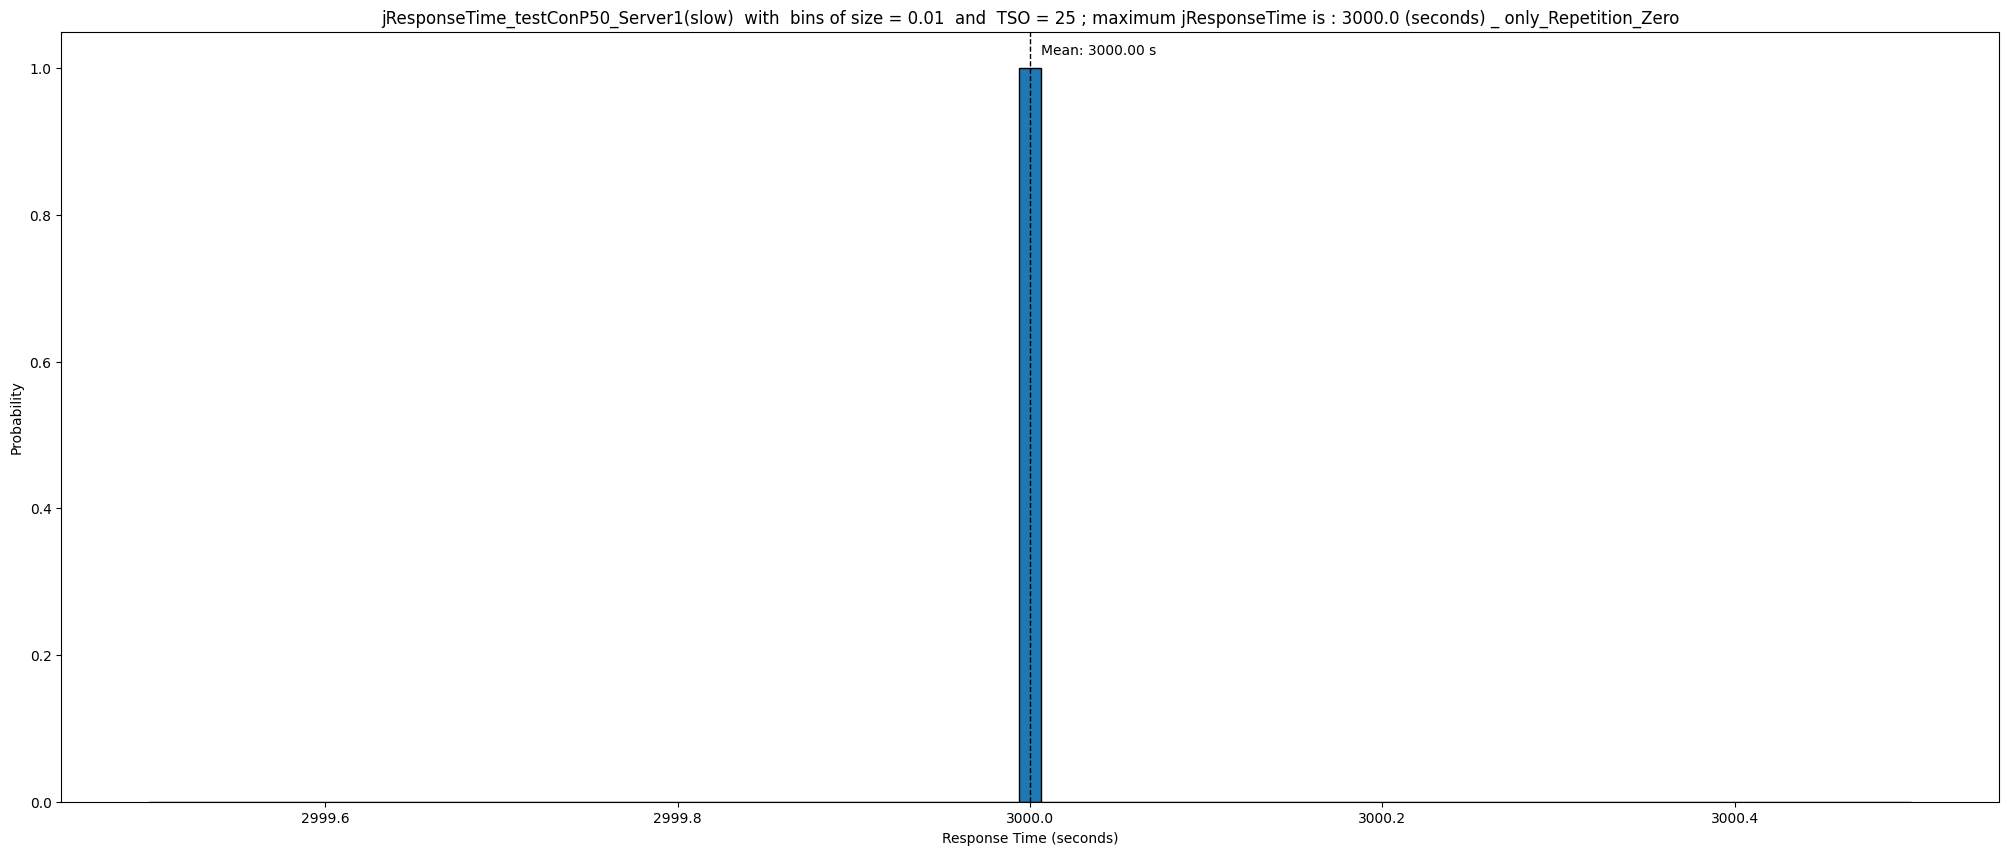

counts :  [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0.]
bins :  [3599.5        3599.51298701 3599.52597403 3599.53896104 3599.55194805
 3599.56493506 3599.57792208 3599.59090909 3599.6038961  3599.61688312
 3599.62987013 3599.64285714 3599.65584416 3599.66883117 3599.68181818
 3599.69480519 3599.70779221 3599.72077922 3599.73376623 3599.74675325
 3599.75974026 3599.77272727 3599.78571429 3599.7987013  3599.81168831
 3599.82467532 3599.83766234 3599.85064935 3599.86363636 3599.87662338
 3599.88961039 3599.9025974  3599.91558442 3599.92857143 3599.94155844
 3599.95454545 3599.96753247 3599.98051948 3599.99350649 3600.00649351
 3600.01948052 3600.03246753 3600.04545455 3600.05844156 3600.07142857
 3600.08441558 3600.0974026  3600.11038961 3600.12337662 3600.13636364
 3600.14935065 3600.16233766 3600.17

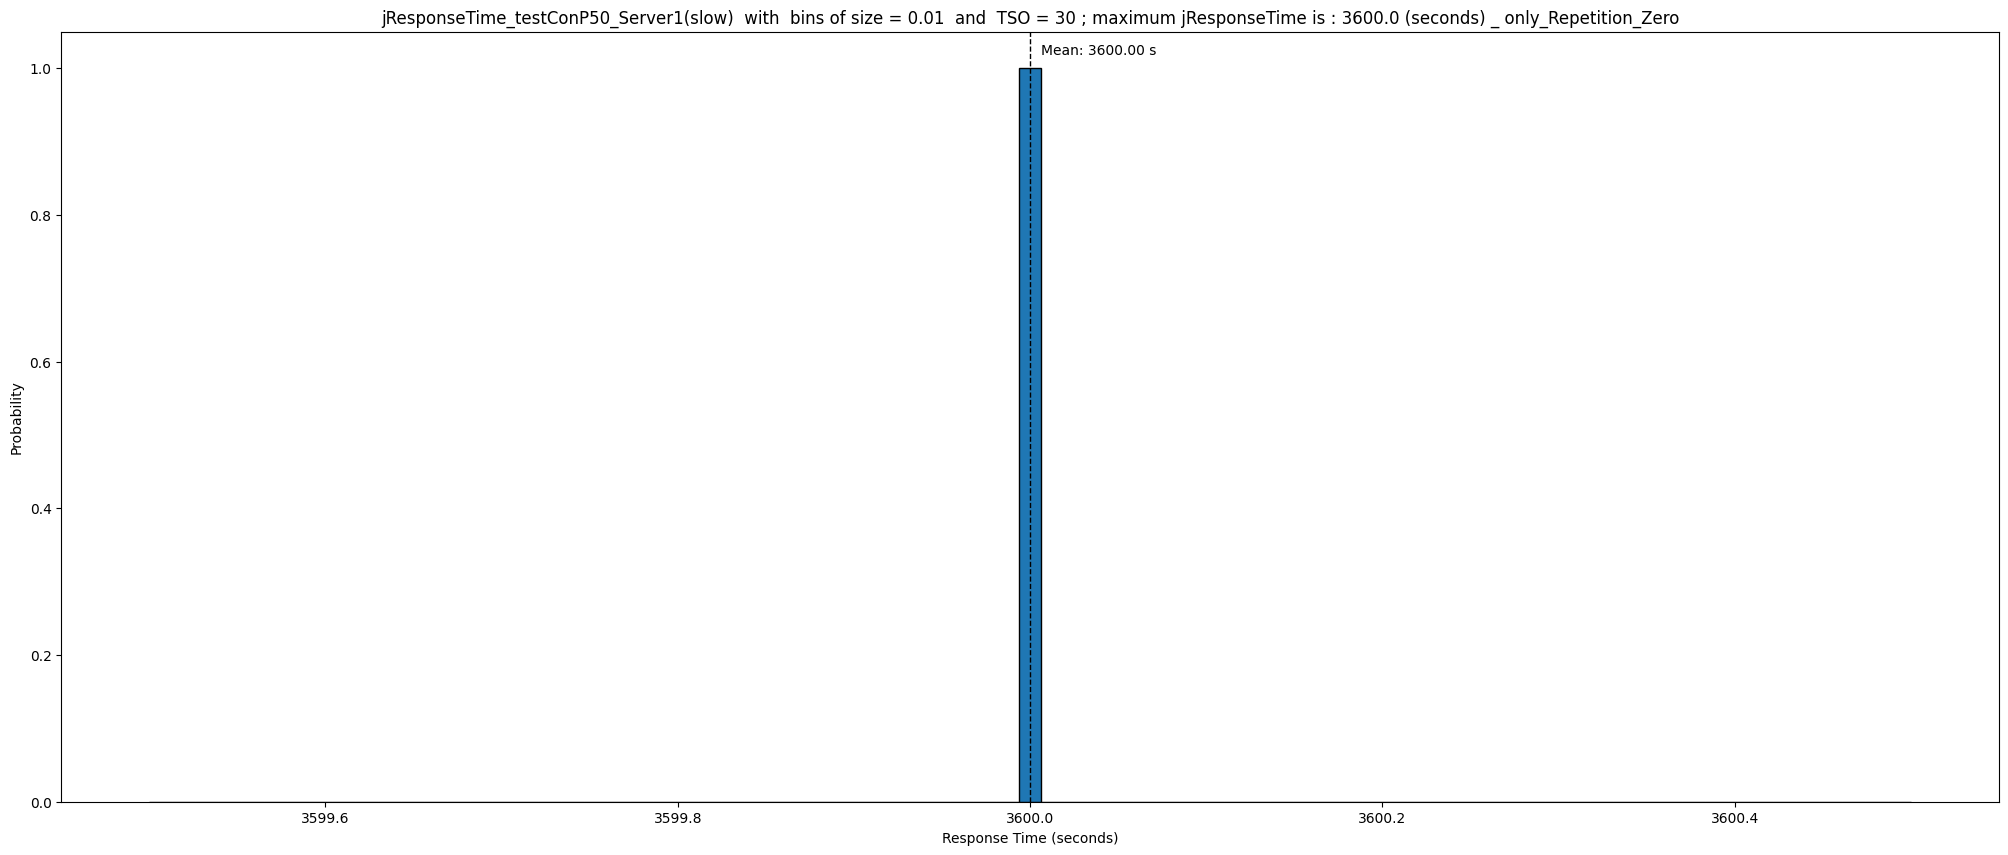

counts :  [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0.]
bins :  [4199.5        4199.51298701 4199.52597403 4199.53896104 4199.55194805
 4199.56493506 4199.57792208 4199.59090909 4199.6038961  4199.61688312
 4199.62987013 4199.64285714 4199.65584416 4199.66883117 4199.68181818
 4199.69480519 4199.70779221 4199.72077922 4199.73376623 4199.74675325
 4199.75974026 4199.77272727 4199.78571429 4199.7987013  4199.81168831
 4199.82467532 4199.83766234 4199.85064935 4199.86363636 4199.87662338
 4199.88961039 4199.9025974  4199.91558442 4199.92857143 4199.94155844
 4199.95454545 4199.96753247 4199.98051948 4199.99350649 4200.00649351
 4200.01948052 4200.03246753 4200.04545455 4200.05844156 4200.07142857
 4200.08441558 4200.0974026  4200.11038961 4200.12337662 4200.13636364
 4200.14935065 4200.16233766 4200.17

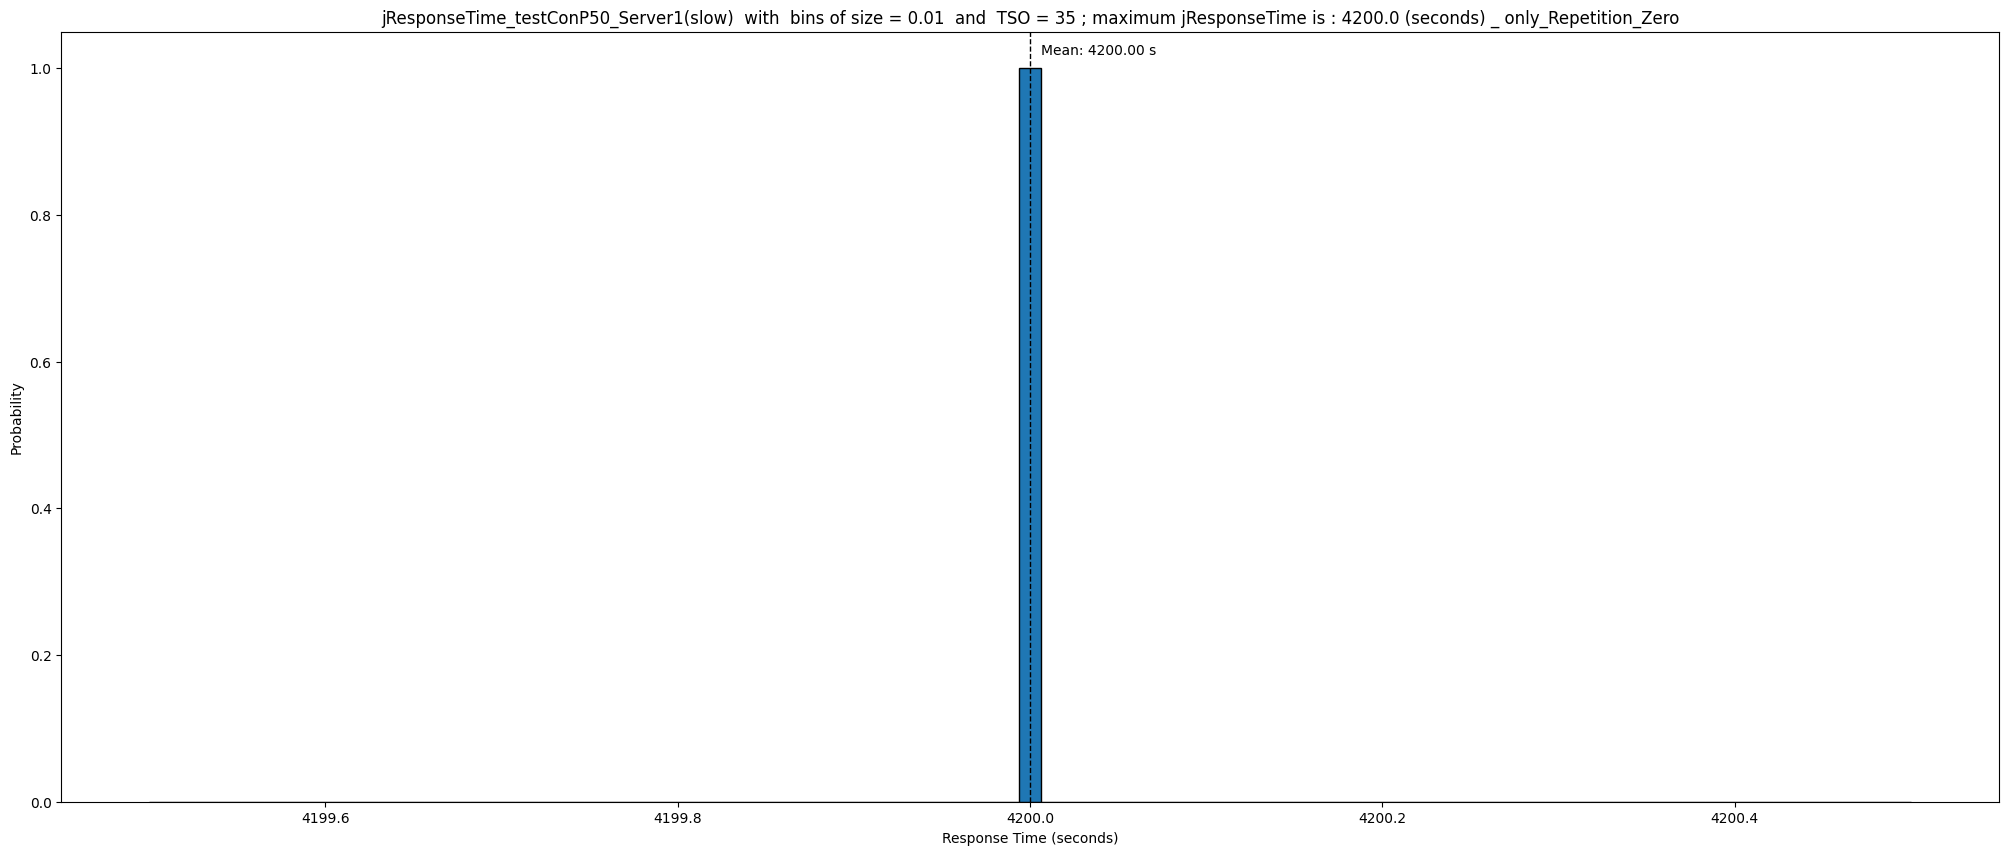

counts :  [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0.]
bins :  [4799.5        4799.51298701 4799.52597403 4799.53896104 4799.55194805
 4799.56493506 4799.57792208 4799.59090909 4799.6038961  4799.61688312
 4799.62987013 4799.64285714 4799.65584416 4799.66883117 4799.68181818
 4799.69480519 4799.70779221 4799.72077922 4799.73376623 4799.74675325
 4799.75974026 4799.77272727 4799.78571429 4799.7987013  4799.81168831
 4799.82467532 4799.83766234 4799.85064935 4799.86363636 4799.87662338
 4799.88961039 4799.9025974  4799.91558442 4799.92857143 4799.94155844
 4799.95454545 4799.96753247 4799.98051948 4799.99350649 4800.00649351
 4800.01948052 4800.03246753 4800.04545455 4800.05844156 4800.07142857
 4800.08441558 4800.0974026  4800.11038961 4800.12337662 4800.13636364
 4800.14935065 4800.16233766 4800.17

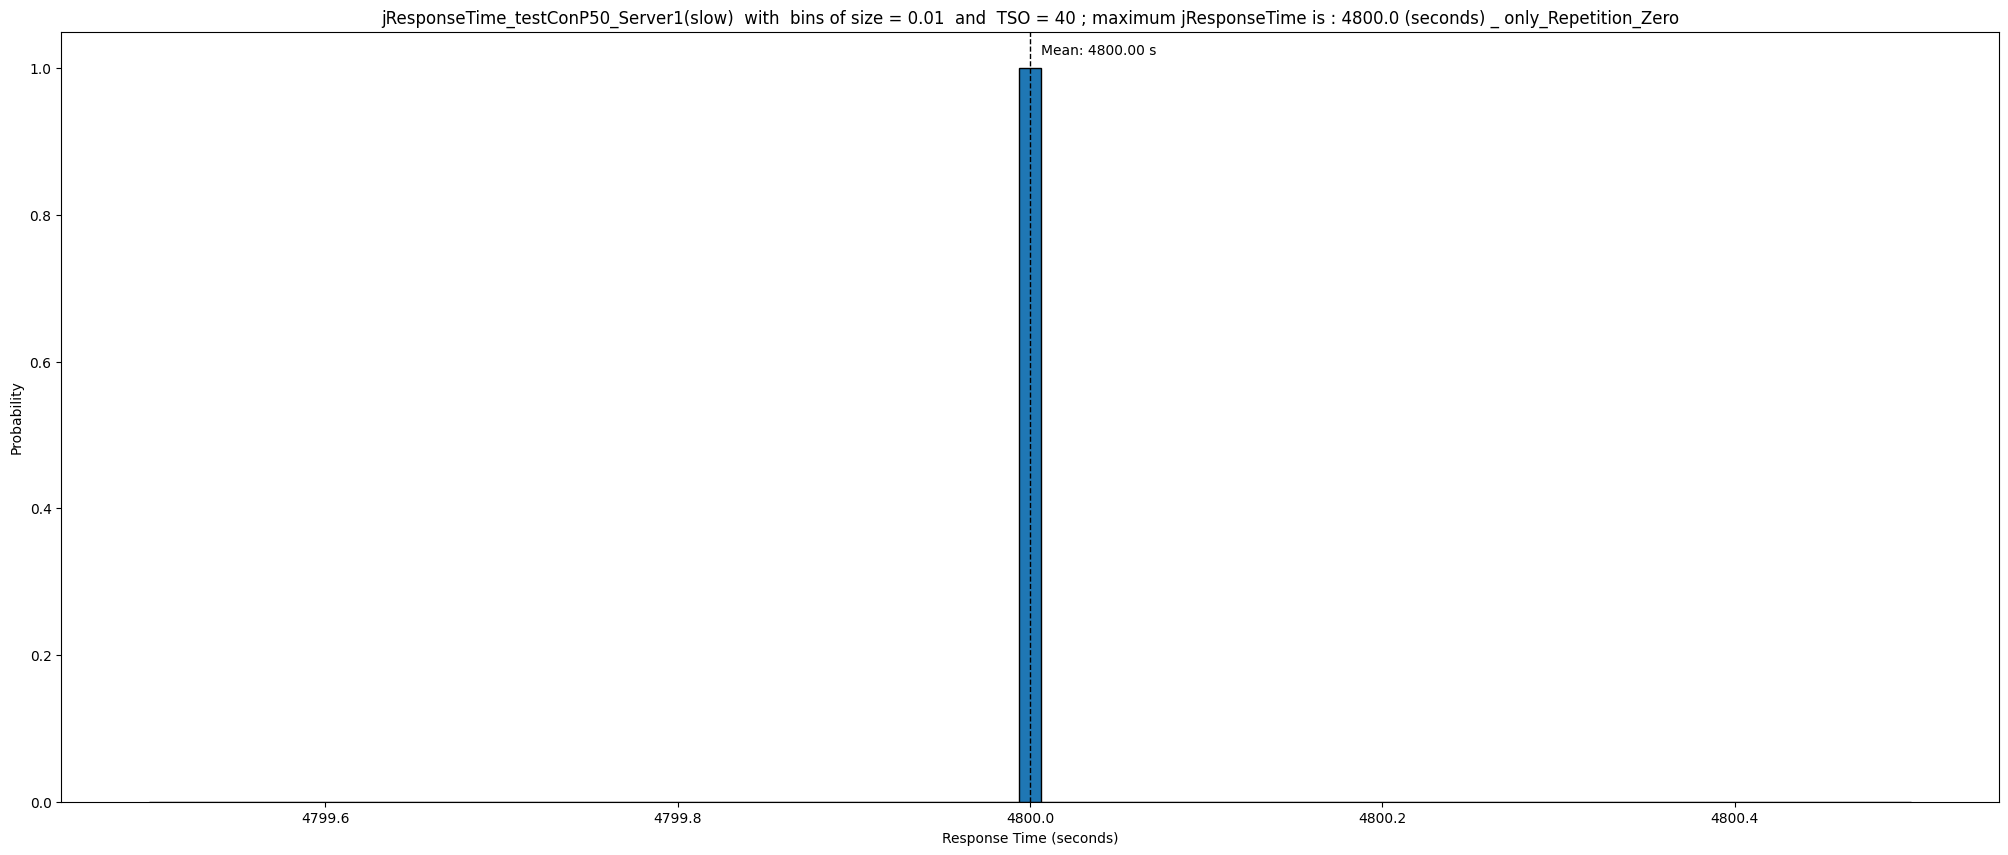

counts :  [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0.]
bins :  [5399.5        5399.51298701 5399.52597403 5399.53896104 5399.55194805
 5399.56493506 5399.57792208 5399.59090909 5399.6038961  5399.61688312
 5399.62987013 5399.64285714 5399.65584416 5399.66883117 5399.68181818
 5399.69480519 5399.70779221 5399.72077922 5399.73376623 5399.74675325
 5399.75974026 5399.77272727 5399.78571429 5399.7987013  5399.81168831
 5399.82467532 5399.83766234 5399.85064935 5399.86363636 5399.87662338
 5399.88961039 5399.9025974  5399.91558442 5399.92857143 5399.94155844
 5399.95454545 5399.96753247 5399.98051948 5399.99350649 5400.00649351
 5400.01948052 5400.03246753 5400.04545455 5400.05844156 5400.07142857
 5400.08441558 5400.0974026  5400.11038961 5400.12337662 5400.13636364
 5400.14935065 5400.16233766 5400.17

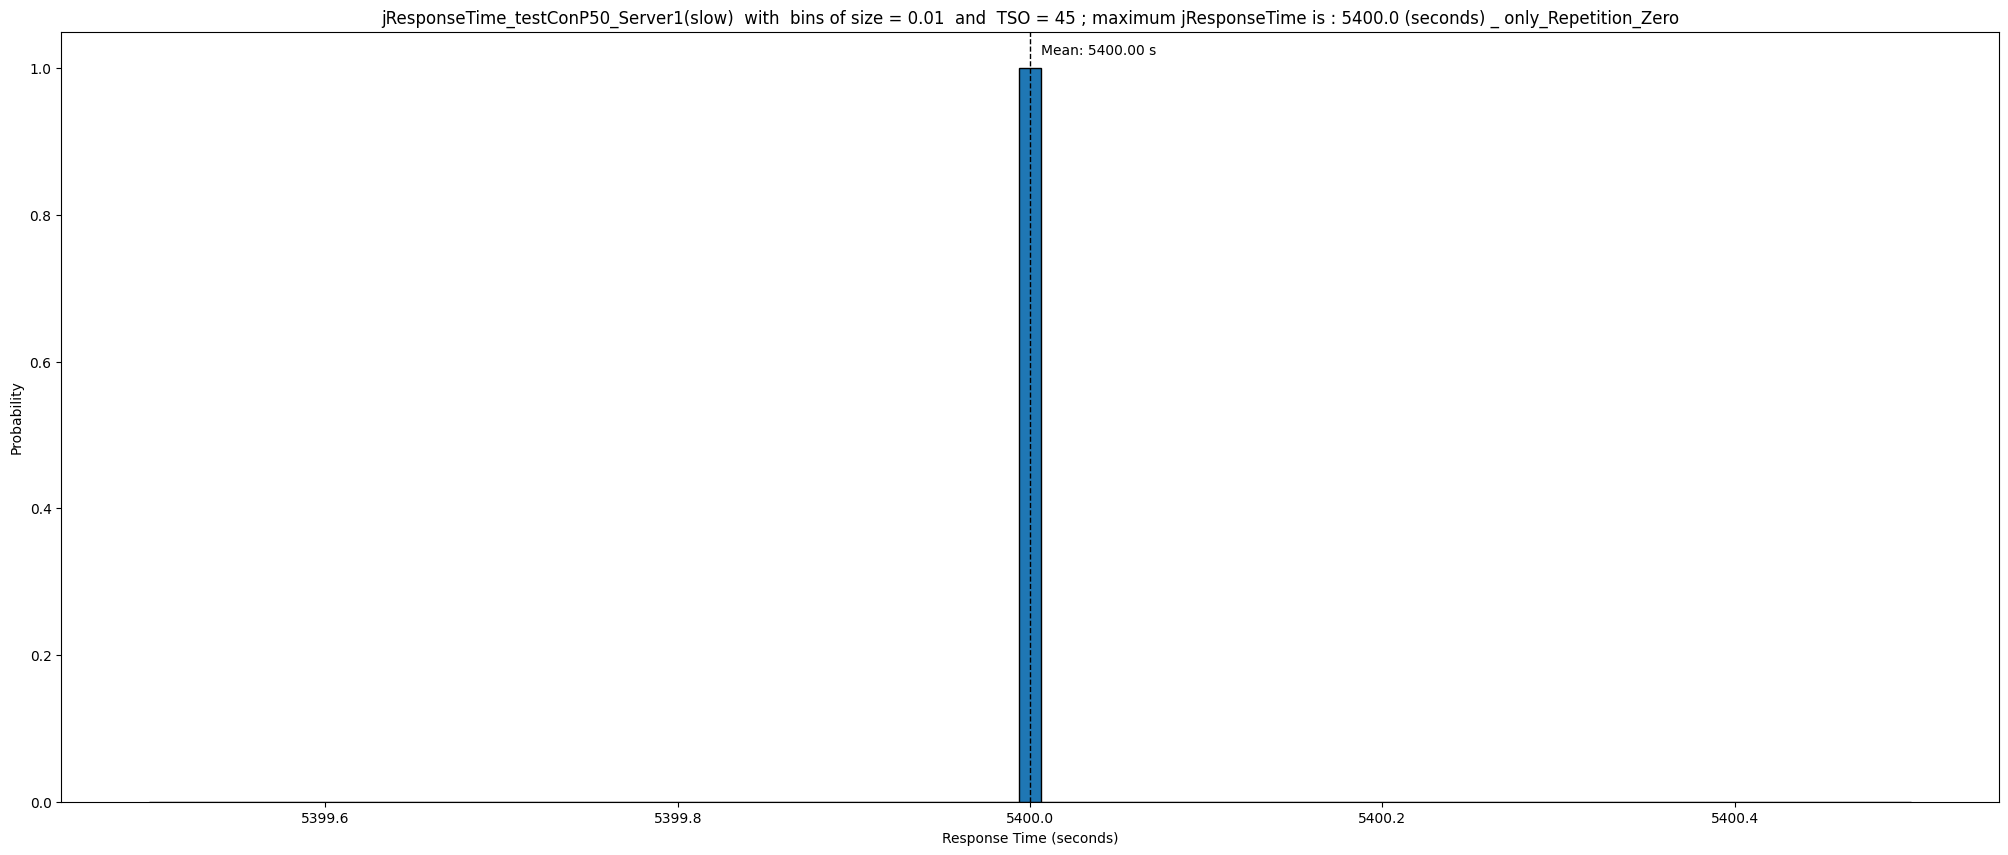

counts :  [0.01413428 0.01295642 0.01295642 0.01295642 0.01295642 0.01295642
 0.01295642 0.01295642 0.01295642 0.01295642 0.01295642 0.01295642
 0.01295642 0.01295642 0.01295642 0.01295642 0.01295642 0.01295642
 0.01295642 0.01295642 0.01295642 0.01295642 0.01295642 0.01295642
 0.01295642 0.01295642 0.01295642 0.01295642 0.01295642 0.01295642
 0.01295642 0.01295642 0.01295642 0.01295642 0.01295642 0.01295642
 0.01295642 0.01295642 0.01295642 0.01295642 0.01295642 0.01295642
 0.01295642 0.01295642 0.01295642 0.01295642 0.01295642 0.01295642
 0.01295642 0.01295642 0.01295642 0.01295642 0.01295642 0.01295642
 0.01295642 0.01295642 0.01295642 0.01295642 0.01295642 0.01295642
 0.01295642 0.01295642 0.01295642 0.01295642 0.01295642 0.01295642
 0.01295642 0.01295642 0.01295642 0.01295642 0.01295642 0.01295642
 0.01295642 0.01295642 0.01295642 0.01295642 0.01413428]
bins :  [ 14400.          21007.79220779  27615.58441558  34223.37662338
  40831.16883117  47438.96103896  54046.75324675  60654.

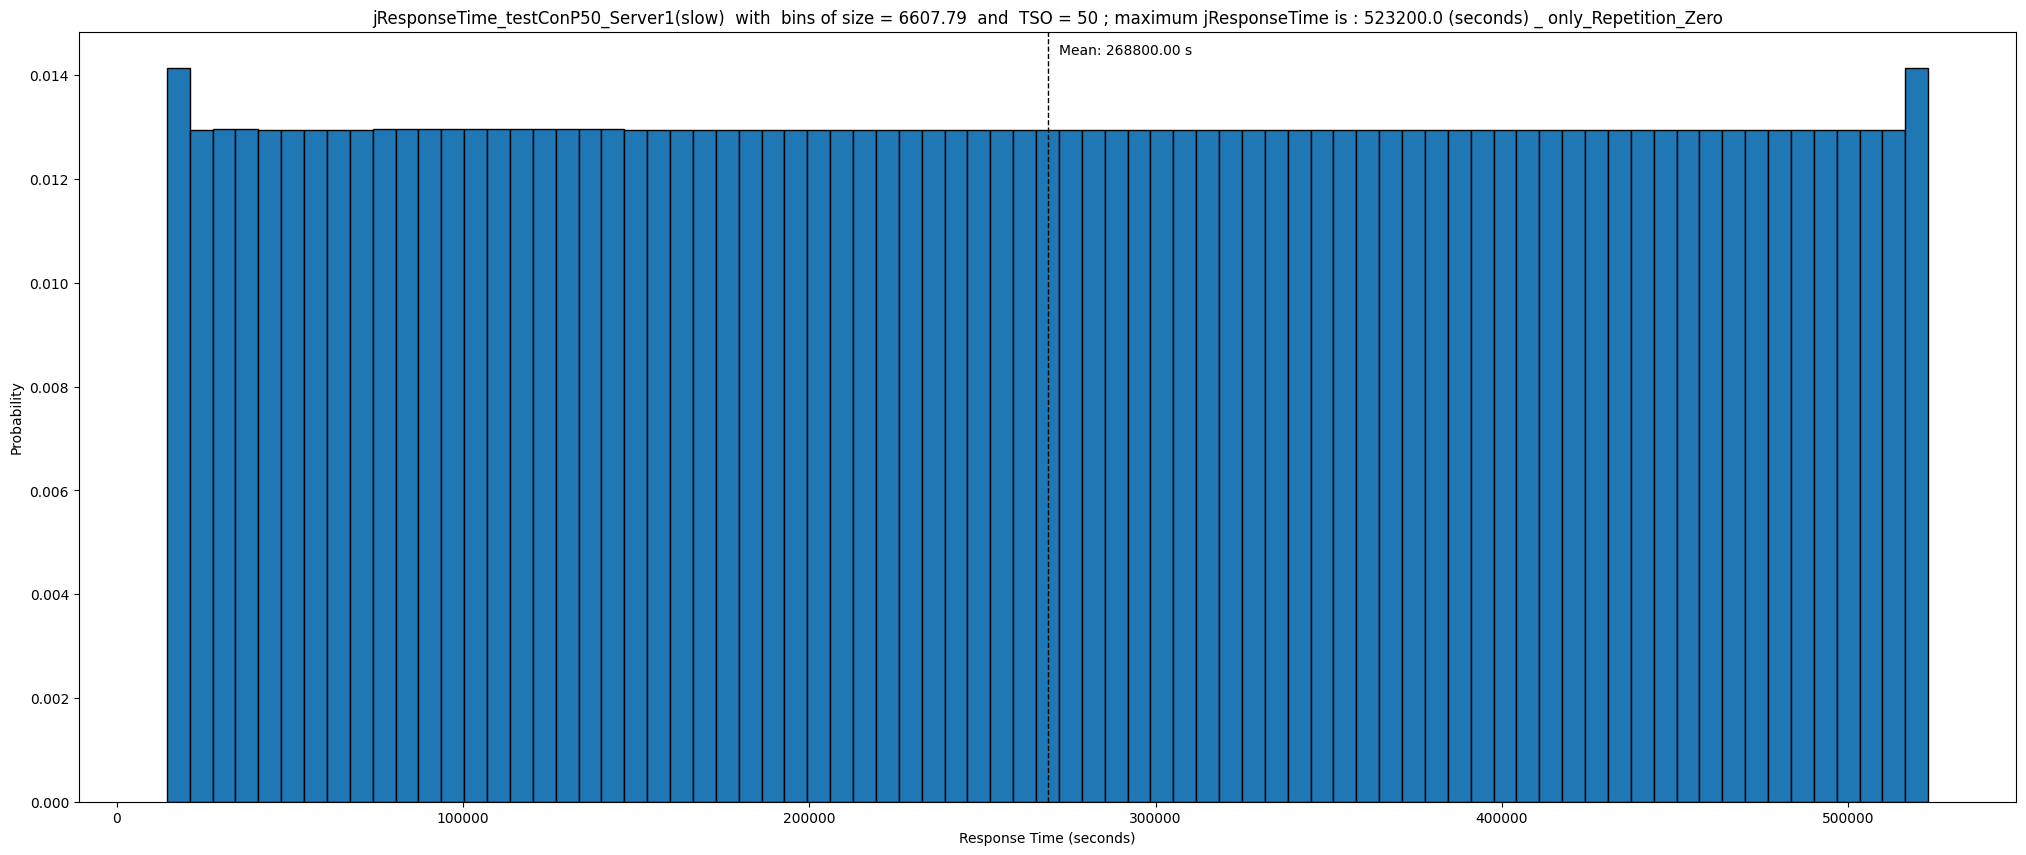

In [11]:
maximum_bins_number = 77

plot_dir = f'../images/plots' 
for srvn in range(0, len(server_names)):
    for tso_this_iter in range(0, len(target_tso), 1) :
        plt.rcParams["figure.figsize"] = (25, 10)
        

        massimo_jResTime = float( max(general_nums[srvn][tso_this_iter]) )
        #   print("massimo_jResTime : ", massimo_jResTime)
        #   bin_size_chosen = 35
        #   if int(target_tso[tso_this_iter]) > 30 and use_exp == False:
        #       bin_size_chosen = int(maximum_bins_number)
        #   print("bin_size_chosen is : ", bin_size_chosen)
        
        counts, bins = np.histogram( general_nums[srvn][tso_this_iter], bins = maximum_bins_number )

        counts = counts / len( general_nums[srvn][tso_this_iter] ) # normalize count
        print("counts : ", counts)
        print("bins : ", bins)

        #   #   my_massimo_jResTime = max(general_nums[srvn][tso_this_iter])
        #   #   my_bins = []
        #   #   my_counts = []
        #   #   for it in range(0, my_massimo_jResTime+1):
        #   #       #   print("it : ", it)
        #   #       my_bins.append(it-0.5)
        #   #       my_counts.append(0.0)
        #   #       
        #   #   for it in range(0, len(general_nums[srvn][tso_this_iter])):
        #   #       my_counts[general_nums[srvn][tso_this_iter][it]] += 1
        #   #   for it in range(0, len(my_counts)):
        #   #       my_counts[it] = my_counts[it]/len(general_nums[srvn][tso_this_iter])
        #   #   #   print(my_counts)
        #   #   my_bins.append(my_bins[-1]+1)
        #   #   #   print(my_bins)

        bin_width = bins[1]-bins[0]
        hbw = bin_width / 2
        #   bins = bins - hbw

        plt.hist(bins[:-1], bins, weights=counts, edgecolor='black')
        ax = plt.gca()
        ax.yaxis.get_major_formatter().set_scientific(False)
        ax.yaxis.get_major_formatter().set_useOffset(False)
        ax.xaxis.get_major_formatter().set_useOffset(False)
        ax.xaxis.get_major_formatter().set_scientific(False)

        extras = ["fast", "slow"]
        #   plt.hist(counts)
        name = f'jResponseTime_test{distribution}P{probability}_Server{srvn}({extras[srvn]})'
        if use_all == True: 
            plt.title(f"{name}  with  bins of size = {bins[1]-bins[0]:.2f}  and  TSO = {target_tso[tso_this_iter]} ; maximum jResponseTime is : {massimo_jResTime} (seconds) _ use_All_Repetitions")
        else : 
            plt.title(f"{name}  with  bins of size = {bins[1]-bins[0]:.2f}  and  TSO = {target_tso[tso_this_iter]} ; maximum jResponseTime is : {massimo_jResTime} (seconds) _ only_Repetition_Zero")
        
        #   if bin_size_chosen < 50:
        #       plt.xticks(range(0, bin_size_chosen+1 , 1))
        #   if bin_size_chosen < 100:
        #       plt.xticks(range(0, bin_size_chosen+1 , 2))
        #   elif bin_size_chosen < 200:
        #       plt.xticks(range(0, bin_size_chosen+1 , 5))
        #   elif bin_size_chosen < 400:
        #       plt.xticks(range(0, bin_size_chosen+1 , 10))
        #   elif bin_size_chosen < 800:
        #       plt.xticks(range(0, bin_size_chosen+1 , 20))
        
        plt.ylabel("Probability")
        plt.xlabel("Response Time (seconds)")
        

        # print mean !
        target_asNpArray = np.array(general_nums[srvn][tso_this_iter])
        target_mean = target_asNpArray.mean()

        plt.axvline( target_mean , color='k', linestyle='dashed', linewidth=1 )
        min_ylim, max_ylim = plt.ylim()
        
        text_mean_location = target_mean + hbw
        plt.text( text_mean_location, max_ylim*0.97, 'Mean: {:.2f} s'.format(target_mean))


        save = True
        if save == True:
            if use_all == True: 
                plt.savefig(f'{plot_dir}/jResTime_plot{distribution}P{probability}_{target_tso[tso_this_iter]}_Server{srvn}.png')
            else :
                plt.savefig(f'{plot_dir}/jResTime_plot{distribution}P{probability}_{target_tso[tso_this_iter]}_onlyIterZero_Server{srvn}.png')
        
        plt.show()
    